# DCSE SUMMER COURSE ON AI AND ROBOTICS
<div style="text-align: center;">
    <img src = 'https://summercourse.dcseugm.id/wp-content/uploads/2024/04/5.png' width="300" height="200"></img>
</div>

## Tutorial -- Spam Classification
In today's tutorial, we will try to implement a simple prediction on an unstructured data, namely text data. We will be using the UCI SMS Spam dataset [1]. 
## 1. Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

## 2. Importing Data

In [2]:
data = pd.read_csv("spam.csv",encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 3. Initial Data Lookup & Analysis

In [4]:
#Removing Empty Columns and Renaming Columns
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v1":"label", "v2":"text"})

In [5]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
data.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


<Axes: xlabel='count', ylabel='label'>

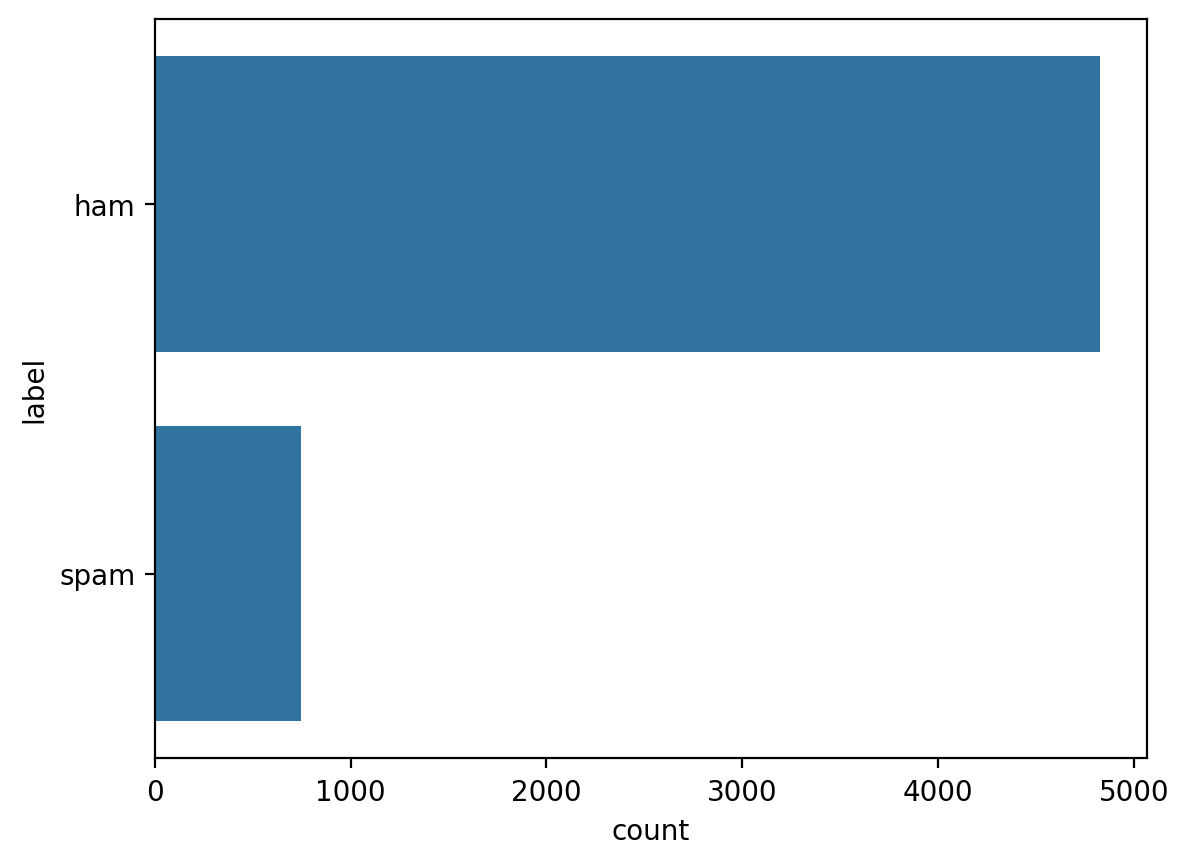

In [8]:
#Count observations in each label
sns.countplot(data.label)

In [9]:
#Using Label Encoder to map Ham to 0 & Spam to 1
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label']) 

In [10]:
data.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 4. Train Test Split
<img src = 'https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/4_train-test-split.jpg'>

To really evaluate the machine learning model's performance, we will use the train-test splittingl. A subset of the data will be used for training and another subset of the data will be used for testing. The testing data is assumed to mimic the real-world data, <b>giving an estimate of the model's performance.</b>

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# 20% of the original 5000 data is used to test the model's performance
X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label"], test_size = 0.2, random_state = 10)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [14]:
X_train

5281               And how you will do that, princess? :)
1300    Those cocksuckers. If it makes you feel better...
5128    Wot about on wed nite I am 3 then but only til 9!
1808    Aiyo a bit pai seh Ì_ noe... Scared he dun rem...
856                         Going to take your babe out ?
                              ...                        
1180                           I'm in chennai velachery:)
3441    Save money on wedding lingerie at www.bridal.p...
1344                     Were somewhere on Fredericksburg
4623    Jus finish blowing my hair. U finish dinner al...
1289    Hey...Great deal...Farm tour 9am to 5pm $95/pa...
Name: text, Length: 4457, dtype: object

## 5. Vectorizing Text
<img src = 'https://www.researchgate.net/publication/354354484/figure/fig2/AS:1080214163595268@1634554534648/Illustration-of-count-vectorization.jpg' width = 1000 height = 800>

The idea of vectorizing the text is that each word or token becomes a feature. Each document, represented in a row of features, have the number of each token being counted

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# Initializing the count vectorizer
vect = CountVectorizer()

In [17]:
# Fitting the count vectorizer to the data
vect.fit(X_train)

CountVectorizer()

Getting all the possible words from texts

In [18]:
# 50 first features and 50 last features
print(vect.get_feature_names_out()[0:50])
print(vect.get_feature_names_out()[-50:])

['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '0125698789' '02' '0207' '02072069400' '02073162414'
 '02085076972' '021' '03' '04' '0430' '05' '050703' '0578' '06' '07'
 '07046744435' '07090201529' '07090298926' '07099833605' '07123456789'
 '07734396839' '07742676969' '07753741225' '0776xxxxxxx' '07781482378'
 '07786200117' '077xxx' '078' '07801543489' '07808247860' '07808726822'
 '07815296484' '07821230901' '078498' '0796xxxxxx' '07xxxxxxxxx' '08'
 '0800' '08000407165' '08000776320' '08000839402' '08000930705']
['yours' 'yourself' 'youuuuu' 'youåõre' 'yoville' 'yowifes' 'yoyyooo' 'yr'
 'yrs' 'ystrday' 'ything' 'yummmm' 'yummy' 'yun' 'yunny' 'yuo' 'yuou'
 'yup' 'yupz' 'zac' 'zaher' 'zealand' 'zebra' 'zed' 'zeros' 'zhong'
 'zindgi' 'zoe' 'zogtorius' 'zoom' 'zyada' 'åð' 'åòharry' 'åòit'
 'åômorrow' 'åôrents' 'ì_' 'ì¼1' 'ìä' 'ìï' 'ó_' 'û_' 'û_thanks' 'ûªm'
 'ûªt' 'ûªve' 'ûï' 'ûïharry' 'ûò' 'ûówell']


In [19]:
X_train_df = vect.transform(X_train)

Transforming the test data into vectors

In [20]:
X_test_df = vect.transform(X_test)

## 6. Machine Learning Pipeline

### Checking All the Algorithms
Generally, Naive Bayes works well on text data and 'naturally imbalanced data'. However, here is a over-simplified explanation for each model used:

1. Naive-Bayes: A learning model which tries to predict based on the training data distribution [2]. It utilizes the popular Baye's Rule for probability. A Multinomial Naive Bayes is suitable for discrete data such as text
2. Logistic Regression: A discriminative learning model which tries to create two 'region' of classes by fitting the data unto a function[3].
3. K-Nearest Neighbors: Assuming each  class should be simillar, K-Nearest Neighbors algorithm works by calculating each distance of data point to another data point to determine which class it belongs to [4].
4. Random Forest: An ensemble method and more robust than decision trees [5], Random Forest tries to create many tree in a bootstrap sampling method of the training data[6].
5. AdaBoost: An ensemble method that learns adaptively from its previous mistakes [7]. Re-learning only from the wrongly classified data.
6. Support Vector Classifier: A 'separator' classifier that also uses soft-separators to determine the class of a data [8].

In [21]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pipeline = [MultinomialNB(), LogisticRegression(), KNeighborsClassifier(n_neighbors=5), RandomForestClassifier(), AdaBoostClassifier(), SVC(kernel='linear')]
modelNames = []
for model in pipeline:
    modelName = str(model)[0:str(model).index('(')]
    modelNames.append(modelName)
    model.fit(X_train_df,y_train)
    prediction[modelName] = model.predict(X_test_df)
    print(modelName +"    "+ str(accuracy_score(y_test,prediction[modelName])))

MultinomialNB    0.9883408071748879
LogisticRegression    0.97847533632287
KNeighborsClassifier    0.9121076233183857
RandomForestClassifier    0.9730941704035875
AdaBoostClassifier    0.967713004484305
SVC    0.9838565022421525


In [22]:
for eachModel in modelNames:
    print(eachModel +" \n "+classification_report(y_test, prediction[eachModel], target_names = ["Ham", "Spam"]))

MultinomialNB 
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.97      0.95      0.96       150

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

LogisticRegression 
               precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

KNeighborsClassifier 
               precision    recall  f1-score   support

         Ham       0.91      1.00      0.95       965
        Spam       1.00      0.35      0.51       150

    accuracy                           0.91      1115
   macro avg       0.95      0.67      0.73      1115
weighted avg  

## 7. Parameter Tuning using GridSearch

Based, on the above ML models, Naive Bayes gives the best performance. However, we want to tune the parameter, to find the best alpha

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
alpha = np.arange(0.0,1.5,0.1)
alpha

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4])

In [25]:
param_grid = dict(alpha=alpha)

In [26]:
model = MultinomialNB()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4])})

In [27]:
grid.best_estimator_

MultinomialNB(alpha=0.1)

In [28]:
grid.best_params_

{'alpha': 0.1}

In [29]:
grid.best_score_

0.981152078835188

In [30]:
grid.cv_results_

{'mean_fit_time': array([0.00131111, 0.00114799, 0.00103002, 0.00103493, 0.00099382,
        0.00096769, 0.00098586, 0.00098448, 0.00101719, 0.00100842,
        0.00100536, 0.00099792, 0.0010251 , 0.00104475, 0.00105009]),
 'std_fit_time': array([3.81640438e-04, 1.81540617e-04, 1.10018227e-05, 4.52981246e-05,
        5.93772365e-06, 1.87484949e-05, 1.60857466e-05, 6.62168706e-06,
        5.37706580e-06, 4.57266697e-06, 5.31710850e-06, 3.11444393e-06,
        2.40363769e-05, 2.91612336e-06, 3.62396240e-06]),
 'mean_score_time': array([0.00034471, 0.00040541, 0.0003222 , 0.00034328, 0.00032392,
        0.00032377, 0.00032306, 0.00031834, 0.00031919, 0.00031767,
        0.00031619, 0.00031567, 0.00032425, 0.00032797, 0.00032821]),
 'std_score_time': array([2.28694998e-05, 8.92459819e-05, 3.40396276e-06, 3.17314976e-05,
        3.96836248e-06, 7.40864396e-06, 6.03721792e-06, 5.52267189e-06,
        1.52587891e-06, 2.52588704e-06, 6.97552626e-07, 1.30587234e-06,
        3.37174788e-06, 2.40

In [31]:
best_model = MultinomialNB(alpha=0.1)
best_model.fit(X_train_df, y_train)

MultinomialNB(alpha=0.1)

## 8. Evaluation
In evaluating the classification problem, we will be using a lot the confusion matrix:
<div style="text-align: center;">
    <img src = 'https://kobia.fr/wp-content/uploads/2021/10/00-02-02-confusion-matrix-Matrice-de-confusion-grossesse-1.png'>
</div>
Aside from Accruacy, which is denoted by:
$$Accuracy=\frac{TP}{TP+TN+FP+FN}$$

We will also be using the precision and recall, as well as an average of both in the F-Score, specifically F1-Score [9]

<div style="text-align: center;">
    <img src = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/1200px-Precisionrecall.svg.png' width = 350, height = 650>
</div>

$$F1-Score=\frac{2}{\frac{1}{precision}+\frac{1}{recall}}$$

### By checking the above confusion matrices, creating a heatmap for NB with seaborn

In [33]:
prediction = best_model.predict(X_test_df)
conf_mat = confusion_matrix(y_test, prediction)
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

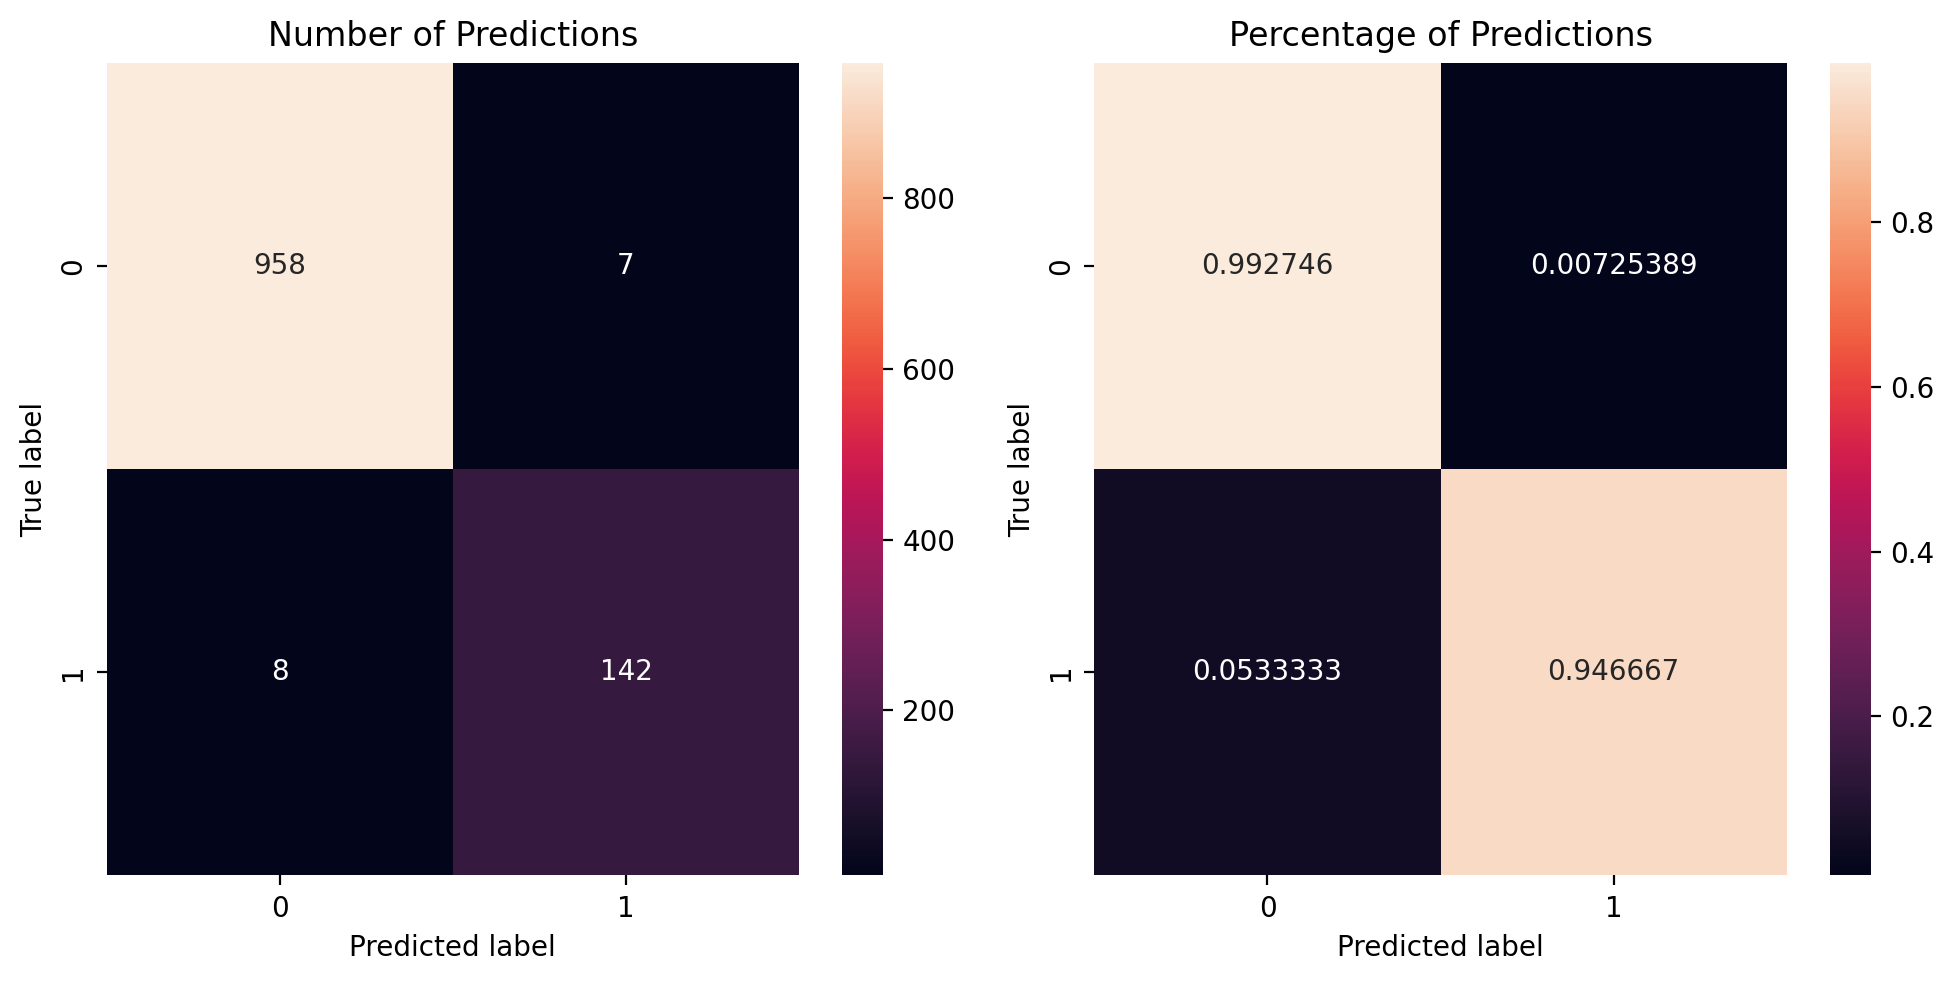

In [34]:
fig, ax = plt.subplots(ncols = 2, figsize = (10,5))
sns.heatmap(conf_mat, annot = True, ax = ax[0], fmt = 'g')
ax[0].set_ylabel('True label')
ax[0].set_xlabel('Predicted label')
ax[0].set_title('Number of Predictions')
sns.heatmap(conf_mat_normalized, annot = True, ax = ax[1], fmt = 'g')
ax[1].set_ylabel('True label')
ax[1].set_xlabel('Predicted label')
ax[1].set_title('Percentage of Predictions')
fig.tight_layout()

In [35]:
print('MultinomialNB' +" \n "+classification_report(y_test, prediction, target_names = ["Ham", "Spam"]))

MultinomialNB 
               precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.95      0.95      0.95       150

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



# Conclusion

### Checking the above confusion matrix, it is obvious that 7 Ham are wrongly classified as Spam, and 8 Spam are misclassified as Ham.

To display the full string in text column

### Misclassified as Spam

In [36]:
X_test[y_test < prediction ]

3892                       Have you heard from this week?
573                                Waiting for your call.
5475    Dhoni have luck to win some big title.so we wi...
4860                               Nokia phone is lovly..
1259    We have sent JD for Customer Service cum Accou...
3140                       Customer place i will call you
494                      Are you free now?can i call now?
Name: text, dtype: object

### Misclassfied as Ham

In [37]:
X_test[y_test > prediction ]

5035    You won't believe it but it's true. It's Incre...
2574    Your next amazing xxx PICSFREE1 video will be ...
1506    Thanks for the Vote. Now sing along with the s...
68      Did you hear about the new \Divorce Barbie\"? ...
2662    Hello darling how are you today? I would love ...
4211    Missed call alert. These numbers called but le...
3572    You won't believe it but it's true. It's Incre...
3979                                   ringtoneking 84484
Name: text, dtype: object

# So, the Naive Bayes algorithm seems to work well with the UCI SMS Spam dataset.

[1] T. Almeida and J. Hidalgo, ‘SMS Spam Collection’. 2012.

[2] G. I. Webb, ‘Na\"ive Bayes’, in Encyclopedia of Machine Learning, C. Sammut and G. I. Webb, Eds. Boston, MA: Springer US, 2010, pp. 713–714.

[3] A. Das, ‘Logistic Regression’, in Encyclopedia of Quality of Life and Well-Being Research, A. C. Michalos, Ed. Dordrecht: Springer Netherlands, 2014, pp. 3680–3682.

[4] A. Mucherino, P. J. Papajorgji, and P. M. Pardalos, ‘k-Nearest Neighbor Classification’, in Data Mining in Agriculture, New York, NY: Springer New York, 2009, pp. 83–106.

[5] J. Fürnkranz, ‘Decision Tree’, in Encyclopedia of Machine Learning, C. Sammut and G. I. Webb, Eds. Boston, MA: Springer US, 2010, pp. 263–267.

[6] L. Breiman, ‘Random Forests’, Machine Learning, vol. 45, no. 1, pp. 5–32, Oct. 2001.

[7] Y. Freund and R. E. Schapire, ‘A desicion-theoretic generalization of on-line learning and an application to boosting’, in Computational Learning Theory, 1995, pp. 23–37.

[8] N. Cristianini and E. Ricci, ‘Support Vector Machines’, in Encyclopedia of Algorithms, M.-Y. Kao, Ed. Boston, MA: Springer US, 2008, pp. 928–932.

[9] C. Goutte and E. Gaussier, ‘A Probabilistic Interpretation of Precision, Recall and F-Score, with Implication for Evaluation’, in Advances in Information Retrieval, 2005, pp. 345–359.